## Using TensorFlow and Keras to perform Regression analysis on our dataset.

In [1]:
# Dependencies.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# ML
import tensorflow as tf

In [2]:
# Main dataset.
df = pd.read_csv('ds31_all_per_capita_emissions.csv')
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [3]:
# Drop any and all NaN values.
df = df.dropna()
df = df.loc[df.Year != 2019]
df.head(10)

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968
5,Afghanistan,2015,3.983,15.427,61.33978,61.41157,0.002724,0.229680
6,Afghanistan,2016,4.220,15.790,64.05488,57.96634,0.002695,0.190618
7,Afghanistan,2017,2.662,16.166,66.80870,54.03117,0.002681,0.188996
8,Afghanistan,2018,2.694,15.942,69.60193,53.43221,0.002661,0.281198
11,Albania,2010,5.269,13.779,91.37948,21.55726,0.003134,1.526970


In [4]:
# Split values.
X = df.drop(columns=['Life Ladder', 'Country'])
y = df['Life Ladder']

X_train = X.loc[X.Year!=2018]
y_train = y.loc[X.Year!=2018]
X_test = X.loc[X.Year==2018]
y_test = y.loc[X.Year==2018]

print(X_train.shape); print(X_test.shape)

(784, 6)
(98, 6)


In [5]:
# Create scaler instance and fit training data.
X_scaler = StandardScaler().fit(X_train)
# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# View standardization.
X_train_scaled[:5]

array([[-1.52752523, -0.2606073 , -2.86193934,  1.24219614, -1.00124689,
        -0.96805113],
       [-1.09108945, -0.05435476, -2.68810858,  1.48352172, -0.92554578,
        -0.94418241],
       [-0.65465367, -0.2890253 , -2.51189009,  1.39789118, -0.88947464,
        -0.95965337],
       [-0.21821789, -0.09109835, -2.33328728,  1.61577492, -0.85688641,
        -0.97351966],
       [ 0.21821789, -0.14760133, -2.15230288,  1.77822612, -0.81653895,
        -0.9794969 ]])

In [32]:
# Define model input.
input_features = len(X_train_scaled[0])
nodes1 = 12
nodes2 = 8
nodes3 = 1

# Build the model.
nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=nodes1, input_dim=input_features, activation='relu'))
nn.add(tf.keras.layers.Dense(units=nodes2, activation='relu'))
#nn.add(tf.keras.layers.Dense(units=nodes3, activation='relu'))
nn.add(tf.keras.layers.Dense(units=1)) # activation='sigmoid'))

# Show model summary.
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model.
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [34]:
# Batch log for epochs.
from tqdm.keras import TqdmCallback

In [35]:
# Fit the model.
nn.fit(X_train_scaled, y_train, epochs=200, verbose=0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [36]:
# Predict.
pred = nn.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test, pred)))
pred_values = [x[0] for x in pred]

0.6170927334088537


In [37]:
# DataFrame of predictions.
results = pd.DataFrame(zip(pred_values, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results.head()

,Predicted,Actual,Difference
0,3.860678,2.694,1.166678
1,5.127456,5.004,0.123456
2,6.111246,5.793,0.318246
3,5.299111,5.062,0.237111
4,7.663280,7.177,0.486280


In [38]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

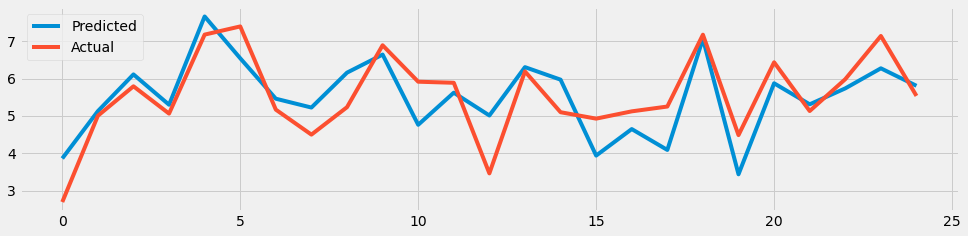

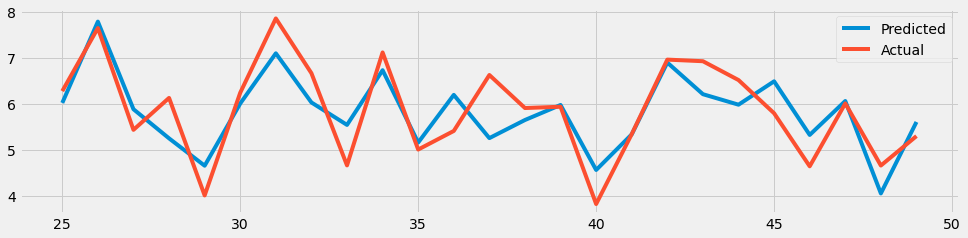

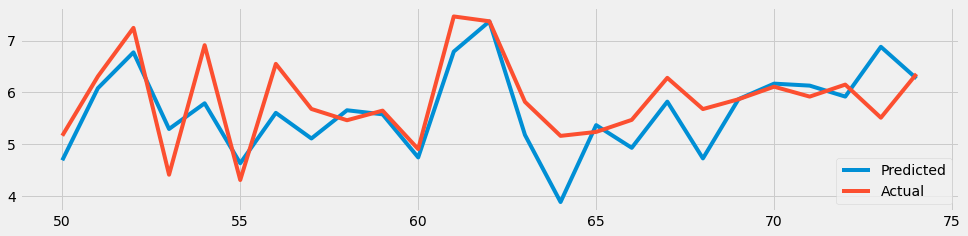

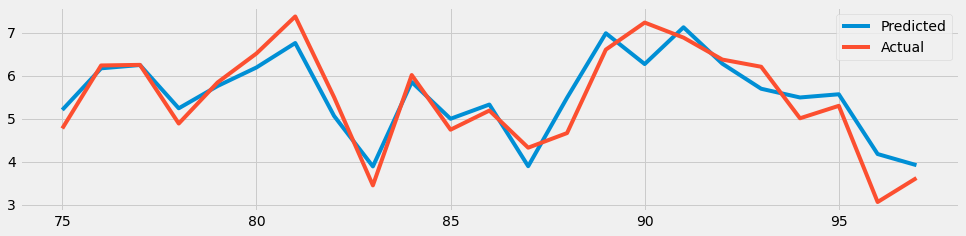

In [39]:
# Plot the differences.
for i in range(0, 100, 25):
    results.iloc[i:i+25].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))

In [15]:
# Save results to compare.
results.to_csv('ml_results/36_nn_2018.csv')